<a href="https://colab.research.google.com/github/ZHANGZ1YUE/RainfallForecasting_ConvEncDec/blob/main/pad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Research/30mins_4ch

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Research/30mins_6ch


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
input = np.load('./input_30mins_4ch.npy')
output = np.load('./output_30mins_4ch.npy')

In [ ]:
def pad_to_shape(array, from_shape_w = 180, to_shape_w = 192, from_shape_h = 120, to_shape_h = 128, how="mirror"):
    # calculate how much to pad in respect with native resolution
    padding_w = int( (to_shape_w - from_shape_w) / 2)
    padding_h = int( (to_shape_h - from_shape_h) / 2)
    # for input shape as (batch, W, H, channels)
    if how == "zero":
        array_padded = np.pad(array, ((0,0),(padding_w,padding_w),(padding_h,padding_h),(0,0)), mode="constant", constant_values=0)
    elif how == "mirror":
        array_padded = np.pad(array, ((0,0),(padding_w,padding_w),(padding_h,padding_h),(0,0)), mode="reflect")
    return array_padded

In [ ]:
padded_input = pad_to_shape(input)
padded_output = pad_to_shape(output)

(557, 192, 128, 6)


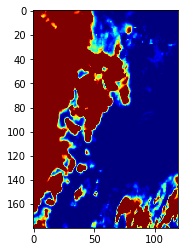

In [ ]:
print(np.shape(padded_input))
#display prepad
plt.imshow(input[0,:,:,0], cmap = "jet", vmax = 2)

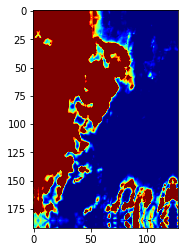

In [ ]:
#display after pad
plt.imshow(padded_input[0,:,:,2], cmap = "jet", vmax = 2)

In [ ]:
save_dir = '/content/drive/MyDrive/Research/30mins_4ch'
np.save(save_dir+'/paddedinput_30mins_4ch.npy', padded_input)
np.save(save_dir+'/paddedoutput_30mins_4ch.npy', padded_output)